The aim of this notebook is to take the raw data and transform into a clean dataset set for modelling.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
order_numbers = pd.read_excel('data/data_task.xlsx', sheet_name='order_numbers')
transaction_data = pd.read_excel('data/data_task.xlsx', sheet_name='transaction_data')
reported_data = pd.read_excel('data/data_task.xlsx', sheet_name='reported_data')

# Clean the order numbers df
    - order df by date
    - ensure the order numbers value increase (create boolean column) 

In [3]:
order_numbers.shape

(856, 2)

In [4]:
order_numbers.head()

,date,order_number
0,2018-01-07,33841906
1,2018-01-22,34008921
2,2018-01-25,34397468
3,2018-02-06,34434432
4,2018-02-08,34579365


In [5]:
order_numbers.dtypes

date            datetime64[ns]
order_number             int64
dtype: object

In [6]:
def validate_order(df, date_col, order_col):
    # Ensure DataFrame is sorted by date
    df = df.sort_values(by=date_col).reset_index(drop=True)

    # Create Boolean column to check if order number is higher than the previous row
    df["order_increasing"] = df[order_col].diff() > 0  

    # Set the first row to True (as there's no previous row to compare)
    df.loc[0, "order_increasing"] = True 

    return df

In [7]:
orders1 = validate_order(order_numbers, 'date', 'order_number')
orders1

,date,order_number,order_increasing
0,2018-01-07,33841906,True
1,2018-01-22,34008921,True
2,2018-01-25,34397468,True
3,2018-02-06,34434432,True
4,2018-02-08,34579365,True
...,...,...,...
851,2022-12-26,89053562,True
852,2022-12-27,89078365,True
853,2022-12-28,89109007,True
854,2022-12-29,89139373,True


In [8]:
orders1.value_counts('order_increasing')

order_increasing
True     638
False    218
Name: count, dtype: int64

In [9]:
orders2 = orders1[orders1['order_increasing'] == True]
orders2.value_counts('order_increasing')

order_increasing
True    638
Name: count, dtype: int64

In [10]:
orders2.head()

,date,order_number,order_increasing
0,2018-01-07,33841906,True
1,2018-01-22,34008921,True
2,2018-01-25,34397468,True
3,2018-02-06,34434432,True
4,2018-02-08,34579365,True


In [11]:
orders3 = orders2.drop(columns=['order_increasing'])
orders3.head()

,date,order_number
0,2018-01-07,33841906
1,2018-01-22,34008921
2,2018-01-25,34397468
3,2018-02-06,34434432
4,2018-02-08,34579365


In [12]:
# Resample to quarterly frequency and aggregate using mean (or sum if necessary)
# Set 'date' as the index for resampling
orders3 = orders3.set_index("date")

orders_quarterly = orders3.resample("Q").mean().reset_index()

orders_quarterly['quarter'] = orders_quarterly['date'].dt.to_period('Q').astype(str)

orders_quarterly = orders_quarterly.drop(columns=['date'])

orders_quarterly.head()

/var/folders/nv/lzp9ffbj6cs24kjrpcj0q1ym0000gn/T/ipykernel_34058/3528067125.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  orders_quarterly = orders3.resample("Q").mean().reset_index()


,order_number,quarter
0,3.502934e+07,2018Q1
1,3.688433e+07,2018Q2
2,3.870401e+07,2018Q3
3,4.096009e+07,2018Q4
4,4.327519e+07,2019Q1


In [13]:
orders_quarterly.shape

(20, 2)

# Transaction data

In [14]:
transaction_data.shape

(1826, 4)

In [15]:
transaction_data.dtypes

date                         datetime64[ns]
total_spend_index                   float64
gross_orders_index                  float64
weekly_active_users_index           float64
dtype: object

In [16]:
transaction_data.head()

,date,total_spend_index,gross_orders_index,weekly_active_users_index
0,2018-01-01,0.052537,0.158983,1.563652
1,2018-01-02,0.839176,1.430843,1.628314
2,2018-01-03,0.182855,0.476948,1.633740
3,2018-01-04,2.364675,1.907790,1.657706
4,2018-01-05,0.687484,1.271860,1.679863


In [17]:
def date_sorting(df, date_col):

    # Ensure DataFrame is sorted by date
    df = df.sort_values(by=date_col).reset_index(drop=True)

    return df

In [18]:
transaction1 = date_sorting(transaction_data, 'date')
transaction1.head()

,date,total_spend_index,gross_orders_index,weekly_active_users_index
0,2018-01-01,0.052537,0.158983,1.563652
1,2018-01-02,0.839176,1.430843,1.628314
2,2018-01-03,0.182855,0.476948,1.633740
3,2018-01-04,2.364675,1.907790,1.657706
4,2018-01-05,0.687484,1.271860,1.679863


In [19]:

# Set 'date' as the index for resampling
transaction1 = transaction1.set_index("date")

# Resample to quarterly frequency and aggregate using mean (or sum if necessary)
transaction_quarterly = transaction1.resample("Q").mean().reset_index()

transaction_quarterly['quarter'] = transaction_quarterly['date'].dt.to_period('Q').astype(str)

transaction_quarterly = transaction_quarterly.drop(columns=['date'])

transaction_quarterly.head()

/var/folders/nv/lzp9ffbj6cs24kjrpcj0q1ym0000gn/T/ipykernel_34058/3210350031.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  transaction_quarterly = transaction1.resample("Q").mean().reset_index()


,total_spend_index,gross_orders_index,weekly_active_users_index,quarter
0,1.020328,1.231231,2.212380,2018Q1
1,3.907097,3.719492,5.080265,2018Q2
2,9.063225,9.020529,12.989319,2018Q3
3,15.179657,16.395936,19.686191,2018Q4
4,13.636270,14.917859,25.002324,2019Q1


In [20]:
transaction_quarterly.shape

(20, 4)

# join the order number data onto the transaction data, (left join to keep all the transaction data)

In [21]:
joined_df = pd.merge(transaction_quarterly, orders_quarterly, how = 'left', on = 'quarter')
joined_df.head()

,total_spend_index,gross_orders_index,weekly_active_users_index,quarter,order_number
0,1.020328,1.231231,2.212380,2018Q1,3.502934e+07
1,3.907097,3.719492,5.080265,2018Q2,3.688433e+07
2,9.063225,9.020529,12.989319,2018Q3,3.870401e+07
3,15.179657,16.395936,19.686191,2018Q4,4.096009e+07
4,13.636270,14.917859,25.002324,2019Q1,4.327519e+07


# Feature Engineering

In [22]:
# create a spend per user column
joined_df["spend_per_user"] = (
    joined_df["total_spend_index"] / joined_df["weekly_active_users_index"]
)

In [23]:
joined_df["prev_spend_per_user"] = joined_df["spend_per_user"].shift(1)
joined_df["prev_order_volume"] = joined_df["order_number"].shift(1)

In [24]:
joined_df.head()

,total_spend_index,gross_orders_index,weekly_active_users_index,quarter,order_number,spend_per_user,prev_spend_per_user,prev_order_volume
0,1.020328,1.231231,2.212380,2018Q1,3.502934e+07,0.461190,NaN,NaN
1,3.907097,3.719492,5.080265,2018Q2,3.688433e+07,0.769073,0.461190,3.502934e+07
2,9.063225,9.020529,12.989319,2018Q3,3.870401e+07,0.697744,0.769073,3.688433e+07
3,15.179657,16.395936,19.686191,2018Q4,4.096009e+07,0.771081,0.697744,3.870401e+07
4,13.636270,14.917859,25.002324,2019Q1,4.327519e+07,0.545400,0.771081,4.096009e+07


# Join the reported data

In [25]:
reported_data.head()

,period,start_date,end_date,revenue_index
0,2018 Q1,2018-01-01,2018-02-28,100.000000
1,2018 Q2,2018-03-01,2018-06-30,253.521127
2,2018 Q3,2018-07-01,2018-08-31,139.788732
3,2018 Q4,2018-09-01,2018-12-31,306.161972
4,2019 Q1,2019-01-01,2019-02-28,117.693662


In [26]:
reported_data['period'] = reported_data['period'].str.replace(r'\s+', '', regex=True)
reported_data.head()

,period,start_date,end_date,revenue_index
0,2018Q1,2018-01-01,2018-02-28,100.000000
1,2018Q2,2018-03-01,2018-06-30,253.521127
2,2018Q3,2018-07-01,2018-08-31,139.788732
3,2018Q4,2018-09-01,2018-12-31,306.161972
4,2019Q1,2019-01-01,2019-02-28,117.693662


In [27]:
main_df = pd.merge(reported_data, joined_df, how = 'left', left_on = 'period', right_on= 'quarter')
main_df

,period,start_date,end_date,revenue_index,total_spend_index,gross_orders_index,weekly_active_users_index,quarter,order_number,spend_per_user,prev_spend_per_user,prev_order_volume
0,2018Q1,2018-01-01,2018-02-28,100.000000,1.020328,1.231231,2.212380,2018Q1,3.502934e+07,0.461190,NaN,NaN
1,2018Q2,2018-03-01,2018-06-30,253.521127,3.907097,3.719492,5.080265,2018Q2,3.688433e+07,0.769073,0.461190,3.502934e+07
2,2018Q3,2018-07-01,2018-08-31,139.788732,9.063225,9.020529,12.989319,2018Q3,3.870401e+07,0.697744,0.769073,3.688433e+07
3,2018Q4,2018-09-01,2018-12-31,306.161972,15.179657,16.395936,19.686191,2018Q4,4.096009e+07,0.771081,0.697744,3.870401e+07
4,2019Q1,2019-01-01,2019-02-28,117.693662,13.636270,14.917859,25.002324,2019Q1,4.327519e+07,0.545400,0.771081,4.096009e+07
5,2019Q2,2019-03-01,2019-06-30,294.102113,23.909396,23.957442,32.189396,2019Q2,4.550379e+07,0.742772,0.545400,4.327519e+07
6,2019Q3,2019-07-01,2019-08-31,156.514085,27.290086,28.153729,41.530273,2019Q3,4.774790e+07,0.657113,0.742772,4.550379e+07
7,2019Q4,2019-09-01,2019-12-31,359.947183,45.263284,46.241446,54.220241,2019Q4,5.049820e+07,0.834804,0.657113,4.774790e+07
8,2020Q1,2020-01-01,2020-02-29,148.063380,42.695804,51.010675,73.601916,2020Q1,5.304286e+07,0.580091,0.834804,5.049820e+07
9,2020Q2,2020-03-01,2020-06-30,289.788732,82.694949,95.808802,99.068715,2020Q2,5.619964e+07,0.834723,0.580091,5.304286e+07


In [34]:
main_df.to_csv('data/modelling_data.csv')

# Plot revenue index by period

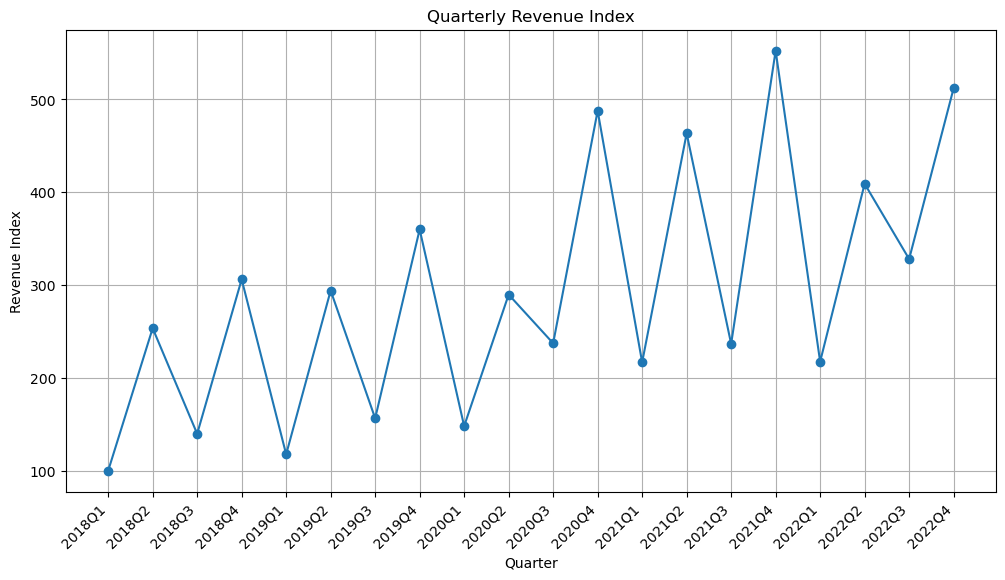

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(main_df.period, main_df.revenue_index, marker='o', linestyle='-')
plt.title('Quarterly Revenue Index')
plt.xlabel('Quarter')
plt.ylabel('Revenue Index')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()